In [24]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [25]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Set the path to the dataset
dataset_path = '/content/drive/MyDrive/Data Set/Digits image'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [28]:
df.head()

,image,label
0,/content/drive/MyDrive/Data Set/Digits image/s...,six
1,/content/drive/MyDrive/Data Set/Digits image/s...,six
2,/content/drive/MyDrive/Data Set/Digits image/s...,six
3,/content/drive/MyDrive/Data Set/Digits image/s...,six
4,/content/drive/MyDrive/Data Set/Digits image/s...,six


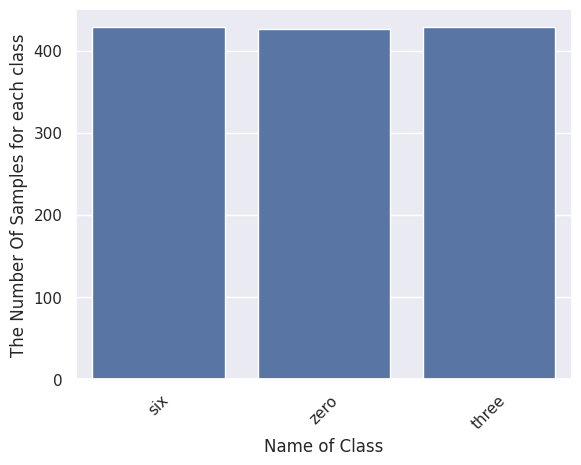

In [29]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

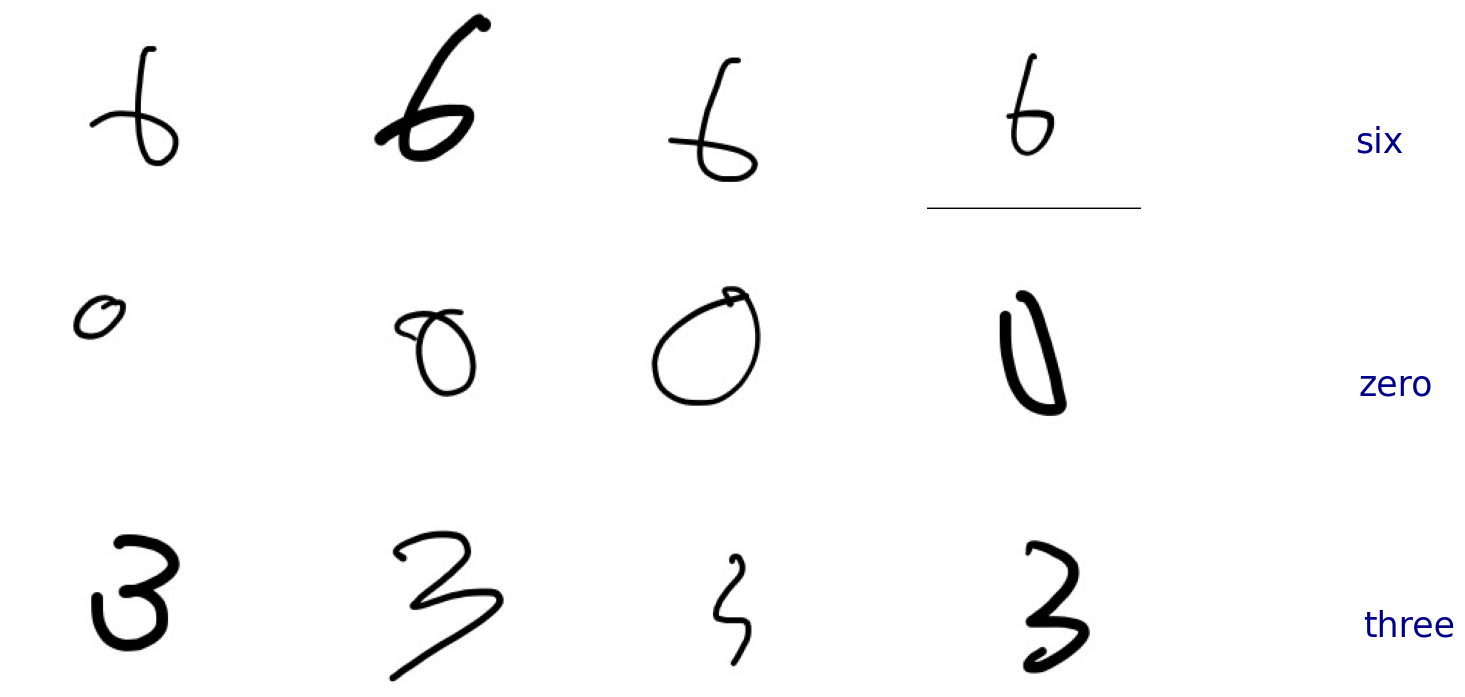

In [30]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]

    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [32]:
from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1027 validated image filenames belonging to 3 classes.
Found 257 validated image filenames belonging to 3 classes.


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
33/33 [==============================] - 12s 357ms/step - loss: 0.9557 - accuracy: 0.5307 - val_loss: 0.9052 - val_accuracy: 0.5097
Epoch 2/10
33/33 [==============================] - 10s 285ms/step - loss: 0.9107 - accuracy: 0.5307 - val_loss: 0.8502 - val_accuracy: 0.5525
Epoch 3/10
33/33 [==============================] - 10s 318ms/step - loss: 0.8546 - accuracy: 0.5920 - val_loss: 0.9115 - val_accuracy: 0.5798
Epoch 4/10
33/33 [==============================] - 11s 332ms/step - loss: 0.8679 - accuracy: 0.5813 - val_loss: 0.8445 - val_accuracy: 0.6148
Epoch 5/10
33/33 [==============================] - 11s 339ms/step - loss: 0.8458 - accuracy: 0.6037 - val_loss: 0.7914 - val_accuracy: 0.6265
Epoch 6/10
33/33 [==============================] - 11s 325ms/step - loss: 0.7621 - accuracy: 0.6524 - val_loss: 0.8743 - val_accuracy: 0.5720
Epoch 7/10
33/33 [==============================] - 11s 320ms/step - loss: 0.7891 - accuracy: 0.6358 - val_loss: 0.8091 - val_accuracy: 0.5914

In [39]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

9/9 [==============================] - 2s 175ms/step - loss: 0.6089 - accuracy: 0.7354
Accuracy: 0.7354085445404053


In [40]:
# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")

Model saved successfully!
